In [2]:

import matplotlib.pyplot as plt
import numpy as np


### Unsupervised Learning

Unsupervised learning is a branch of machine learning where the goal is to find patterns or structure in data without explicit supervision or labeled examples. Unlike supervised learning, unsupervised learning does not rely on predefined output labels during the training process. Instead, it focuses on **discovering relationships**, groupings, or representations within the data itself.

It is particularly useful when dealing with unannotated or unlabeled datasets, making it a powerful tool for data exploration, data preprocessing, and feature engineering.

Common Applications of Unsupervised Learning:

- Clustering: Clustering is one of the main applications of unsupervised learning, where the algorithm groups similar data points together into clusters based on their inherent similarities. It is widely used in customer segmentation, image segmentation, anomaly detection, and recommendation systems.

- Dimensionality Reduction: Unsupervised learning techniques, such as Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE), are used to reduce the dimensionality of high-dimensional data. This helps in visualizing data, speeding up computations, and improving the performance of machine learning models.

- Anomaly Detection: Unsupervised learning can be used to detect anomalies or outliers in data, which are observations that deviate significantly from the majority of the data. This is valuable in fraud detection, fault detection in industrial systems, and network intrusion detection.

- Density Estimation: Density estimation algorithms estimate the probability density function of the data, helping to model the data distribution. Kernel Density Estimation (KDE) and Gaussian Mixture Models (GMM) are commonly used for this purpose.

- Natural Language Processing (NLP): In NLP, unsupervised learning is used for tasks like topic modeling, word embeddings (e.g., Word2Vec), and document clustering, enabling efficient text analysis and information retrieval.

Unsupervised learning techniques play a crucial role in data analysis, exploratory data analysis (EDA), and pattern recognition, providing valuable insights and knowledge discovery from unlabeled data.

# Principal Component Analysis

 **Principle Component Analysis** (PCA) is an unsupervised transformation, used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It can be explained in a simple way using the following analogy:

Imagine you have a collection of photographs of different objects, animals, and landscapes. Each photo has a lot of colors and details. However, you notice that many of the photos have similarities and share common patterns. PCA is like taking these photos and transforming them into a smaller set of pictures that capture the most important and distinctive features of the entire collection.

In more technical terms, PCA is a mathematical technique that reduces the complexity of data by finding the most meaningful directions, called "principal components," in which the data varies the most. These principal components represent the primary patterns and relationships in the data.

That is, we find new features to represent the data that are a **linear combination** of the old data (i.e. we rotate it).

The way PCA finds these new directions is by looking for the directions of maximum variance.
Usually only few components that explain most of the variance in the data are kept. The first principal component represents the most significant pattern or variation in the data, while the second principal component captures the second most significant pattern, and so on. By choosing a few principal components, we can represent the data in a lower-dimensional space, which is easier to understand and visualize.

In scikit-learn, PCA is implemented as a transformer object that learns `n_components` in its `fit` method, 
and can be used on new data to project it on these components.


First, let's import the iris dataset.

In [3]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

Then we import PCA from sklearn

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

Then we fit the PCA model with our data. As PCA is an unsupervised algorithm, there is no output ``y``.

In [5]:
pca.fit(X)

PCA(n_components=2)

We can now transform the data, projected on the principal components, and visualise the new representation:

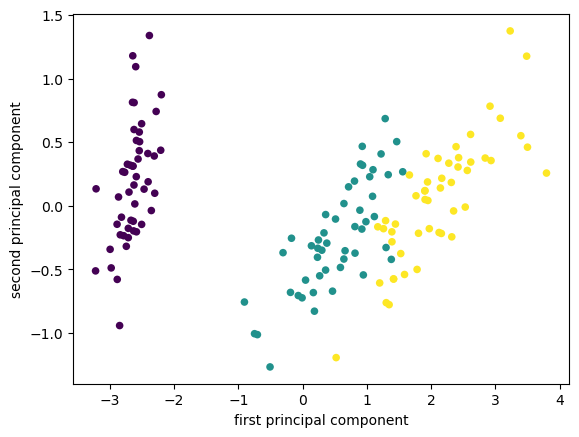

In [6]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [7]:
top_var_features = X[:, ].var(axis=0).argsort()[::-1][:2]

In [8]:
top_var_features

array([2, 0])

You might wonder how much of the information from the original photos is preserved in each of these "summarised" features.

The variance ratio in PCA represents how much information is retained in each principal component. It tells us the proportion of the total variation in the data that is explained by each principal component.

In more technical terms, the variance ratio for a principal component is the fraction of the total variance in the data that is captured by that component. The total variance is the sum of the variances of all the original features in the dataset.

In [9]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

The fist principal component retains 92% of the total variation in the data. The second is less effective to describe the variance

## Example: PCA for facial recognition

One real-life application of PCA is in the field of facial recognition. Facial recognition technology is used in various applications, such as security systems, authentication mechanisms, and image tagging in social media platforms. PCA can be employed to reduce the dimensionality of facial images while preserving the most important features, making the recognition process more efficient.

Let's create an example of using PCA for facial recognition using the famous "Labeled Faces in the Wild" (LFW) dataset available in Scikit-learn:

In [10]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

In [11]:
# Load the Labeled Faces in the Wild (LFW) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [12]:

# Extract the images and their corresponding labels
X, y = lfw_people.data, lfw_people.target
target_names = lfw_people.target_names


In [13]:

# Apply PCA for dimensionality reduction
n_components = 150
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X)


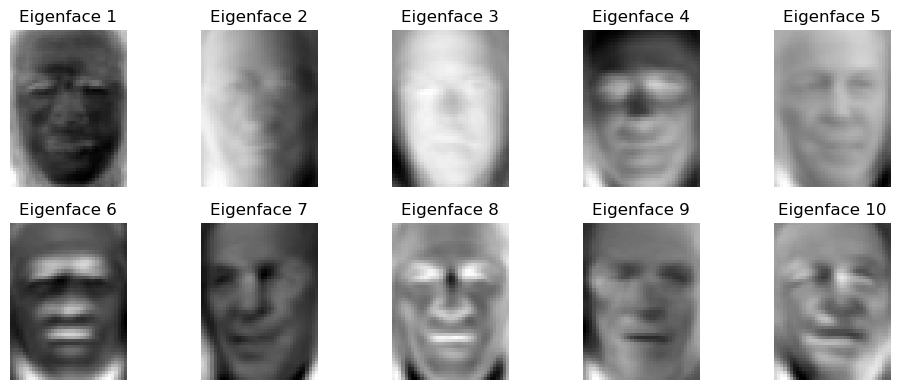

In [14]:
# Visualize the first 10 principal components as eigenfaces
eigenfaces = pca.components_.reshape((n_components, lfw_people.images.shape[1], lfw_people.images.shape[2]))

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"Eigenface {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


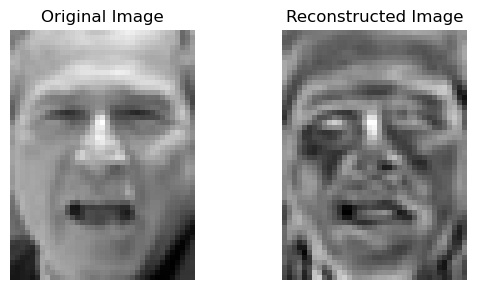

In [15]:
# Reconstruct an example image using the reduced components
example_idx = 10
original_image = X[example_idx].reshape(lfw_people.images.shape[1], lfw_people.images.shape[2])
reconstructed_image = np.dot(X_pca[example_idx], pca.components_).reshape(lfw_people.images.shape[1], lfw_people.images.shape[2])

# Visualize the original and reconstructed images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.tight_layout()
plt.show()


In this example, we used the Labeled Faces in the Wild (LFW) dataset, which contains facial images of different individuals. 

We applied PCA to the images to reduce their dimensionality to 150 principal components, called "eigenfaces." These eigenfaces represent the **most significant features** of facial images in the dataset.

We visualized the first 10 eigenfaces, which are characteristic patterns that contribute most to the variation in the dataset. These eigenfaces can be thought of as a set of "building blocks" that can be combined to reconstruct any facial image from the dataset.

Finally, we reconstructed an example image using the reduced principal components. The reconstruction process shows that the main facial features are preserved despite the significant dimensionality reduction.

Facial recognition systems can use these reduced representations to efficiently match and identify faces, making PCA a powerful tool in real-life applications like biometric authentication and security systems.